### Python-MySQL connector

In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/16.4 MB 6.3 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.4 MB 3.9 MB/s eta 0:00:04
   ------ --------------------------------- 2.6/16.4 MB 3.9 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.4 MB 3.5 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.4 MB 3.6 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.4 MB 3.6 MB/s eta 0:00:04
   -------------- ------------------------- 5.8/16.4 MB 3.7 MB/s eta 0:00:03
   --------------- ------------------------ 6.6/16.4 MB 3.7 MB/s eta 0:00:03
   ----------------- ---------------------- 7.3/16.4 MB 3.7 MB/s eta 0:00:03
   ------------------- -------------------- 8.1/16.4 MB 3.7 MB/s eta 0:00:03
   --


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\chand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import mysql.connector

# Connecting to server
cnx=mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Chanduy@09")

In [2]:
import pandas as pd

In [3]:
query="SELECT * FROM banking_analysis.customer"

In [4]:
df=pd.read_sql(query,cnx)

C:\Users\chand\AppData\Local\Temp\ipykernel_2036\3864670969.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,cnx)


In [5]:
cnx.close()

In [6]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

### Descriptive statictics

In [8]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df.shape

(3000, 25)

In [11]:
df.duplicated().sum()

0

#### Converting joined bank into date time format

In [12]:
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='%d-%m-%Y', errors='coerce')

In [13]:
df.head(5)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [14]:
df.isnull().sum()

ï»¿Client ID                0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64

#### Dropping unnecessary columns

In [15]:
df=df.drop(columns=["ï»¿Client ID","Banking Contact"])

In [16]:
df.head(4)

,Name,Age,Location ID,Joined Bank,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,Raymond Mills,24,34324,2019-05-06,American,Safety Technician IV,High,Jade,75384.77,17677.95,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,Julia Spencer,23,42205,2001-12-10,African,Software Consultant,High,Jade,289834.31,17398.92,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,Stephen Murray,27,7314,2010-01-25,European,Help Desk Operator,High,Gold,169935.23,42825.90,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,Virginia Garza,40,34594,2019-03-28,American,Geologist II,Mid,Silver,356808.11,5473.15,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4


#### Checking unique categorical values

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns

In [18]:
for col in cat_cols:
    print(f"{col} -> {df[col].nunique()} unique values")

Name -> 2913 unique values
Nationality -> 5 unique values
Occupation -> 195 unique values
Fee Structure -> 3 unique values
Loyalty Classification -> 4 unique values


### Univariate Analysis

In [19]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index(['Age', 'Location ID', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')


#### Histogram and Box plot

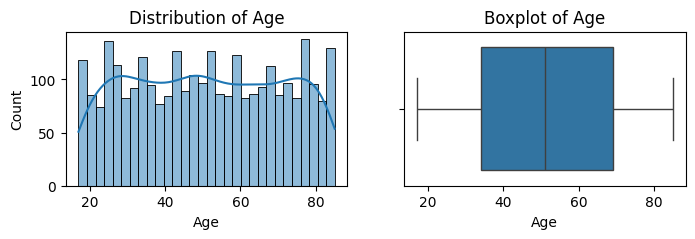

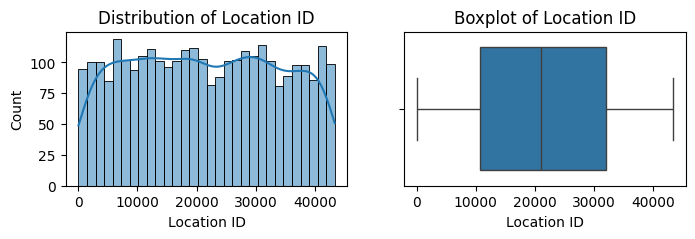

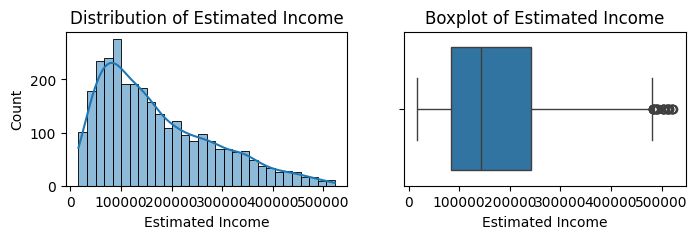

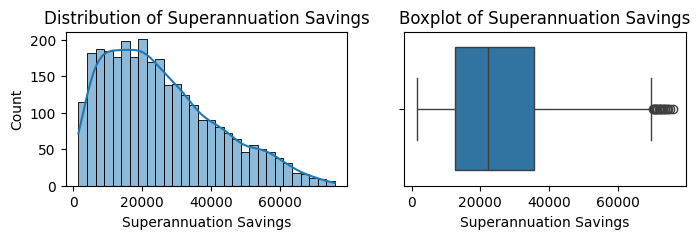

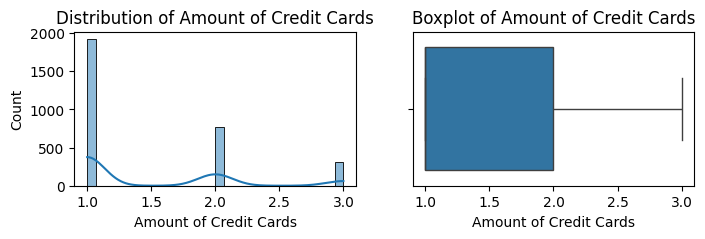

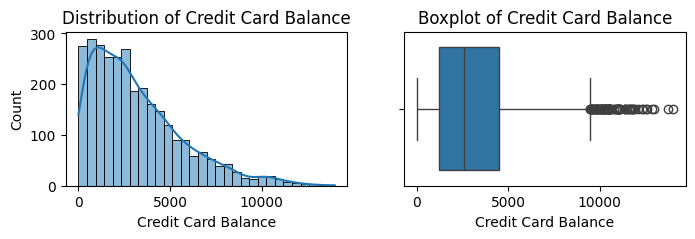

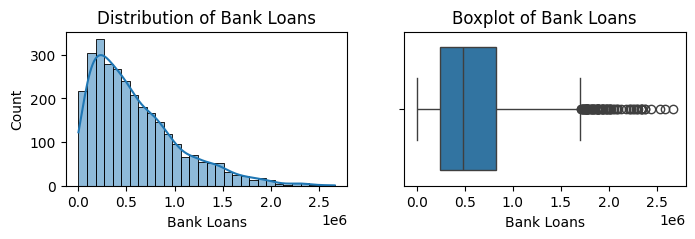

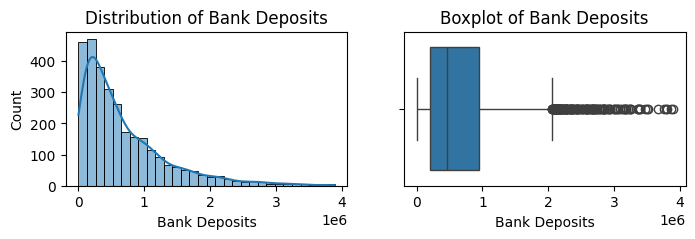

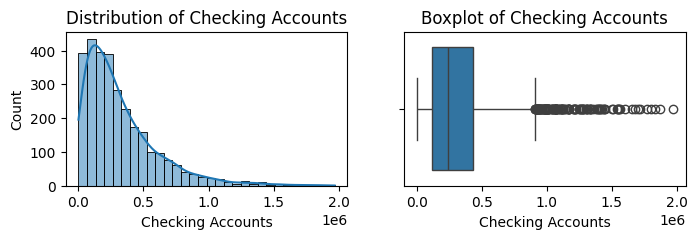

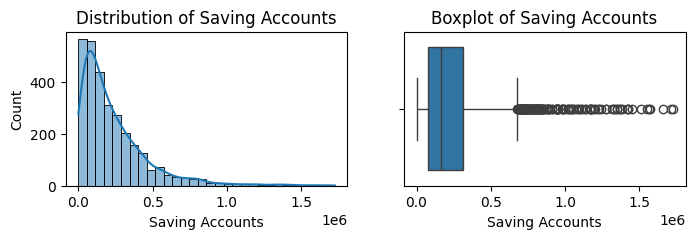

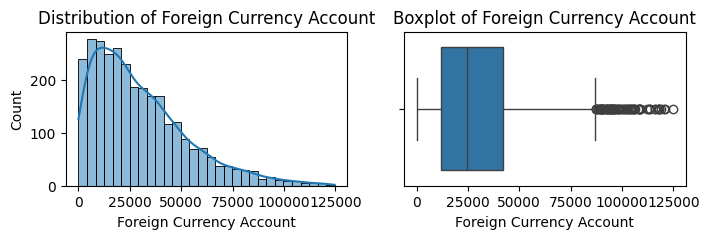

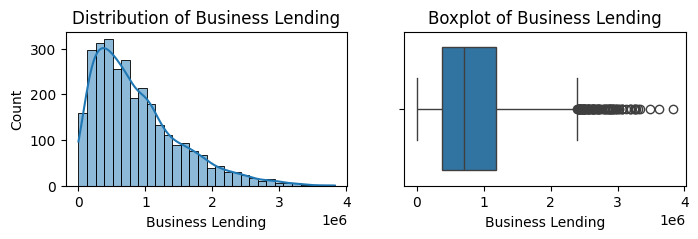

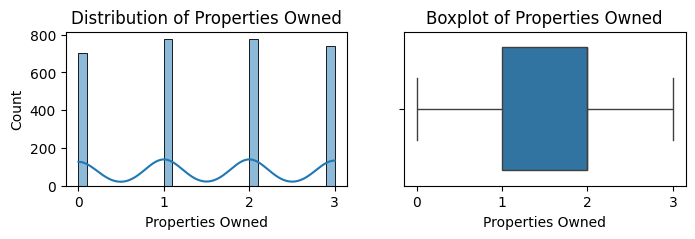

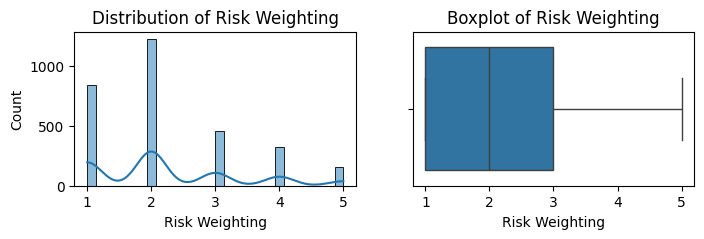

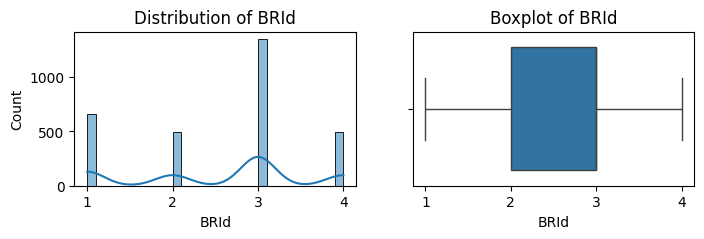

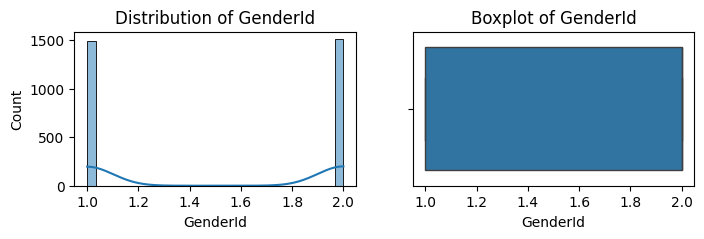

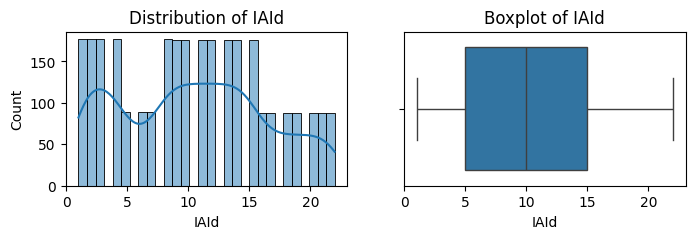

In [20]:
for col in num_cols:
    plt.figure(figsize=(8,2))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

### Bivariate Analysis

#### Estimated income vs Bank Deposits scatter plot

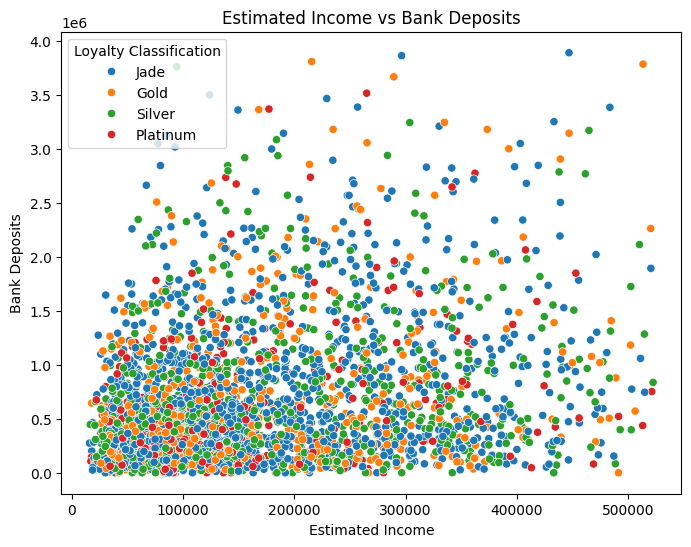

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Estimated Income', y='Bank Deposits', data=df, hue='Loyalty Classification')
plt.title("Estimated Income vs Bank Deposits")
plt.show()

In [22]:
income_by_occ=df.groupby('Occupation')['Estimated Income'].mean().sort_values()
print("\nAverage Income by Occupation:\n", income_by_occ)


Average Income by Occupation:
 Occupation
Staff Accountant I              97680.158000
Mechanical Systems Engineer    102757.178000
Civil Engineer                 110674.077857
Accounting Assistant IV        113763.525789
Chief Design Engineer          114351.251818
                                   ...      
Software Engineer I            236520.376923
General Manager                239704.070625
Desktop Support Technician     250319.824545
Software Engineer IV           251359.600000
Environmental Tech             251713.951333
Name: Estimated Income, Length: 195, dtype: float64


### Time-based Analysis

In [23]:
df['Join_Year'] = df['Joined Bank'].dt.year

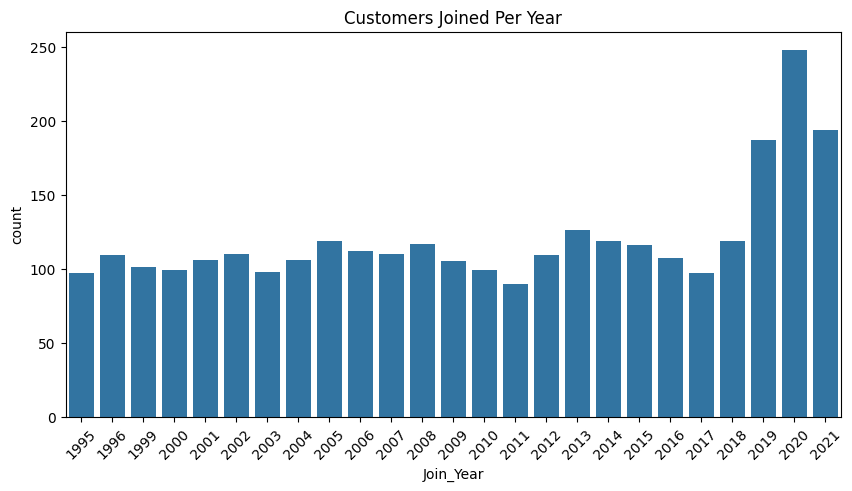

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Join_Year', data=df)
plt.title("Customers Joined Per Year")
plt.xticks(rotation=45)
plt.show()

#### Clustering using K-means

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
X=df[['Estimated Income','Bank Deposits','Bank Loans']].dropna()
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [37]:
kmean=KMeans(n_clusters=3,random_state=42)
df['Clusters']=kmean.fit_predict(X_scaled)

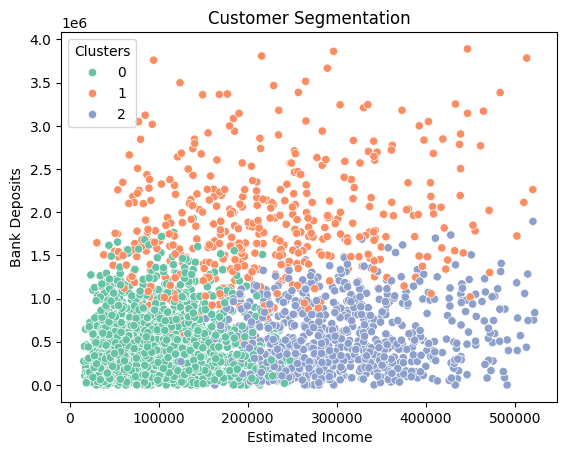

In [38]:
sns.scatterplot(x='Estimated Income', y='Bank Deposits', hue='Clusters', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.show();

#### Elbow method to find no.of clusters

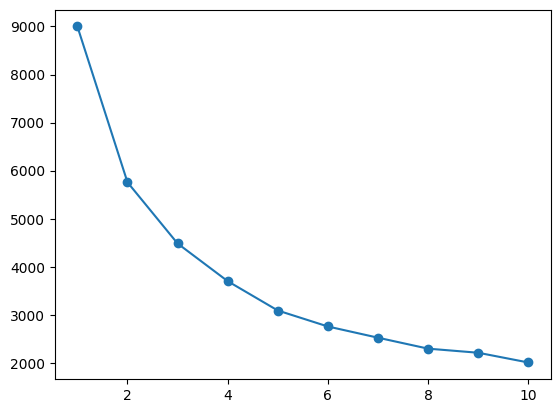

In [34]:
wss=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

x=np.arange(1,11)
plt.scatter(x,wss)
plt.plot(x,wss)

### Loyalty Insights

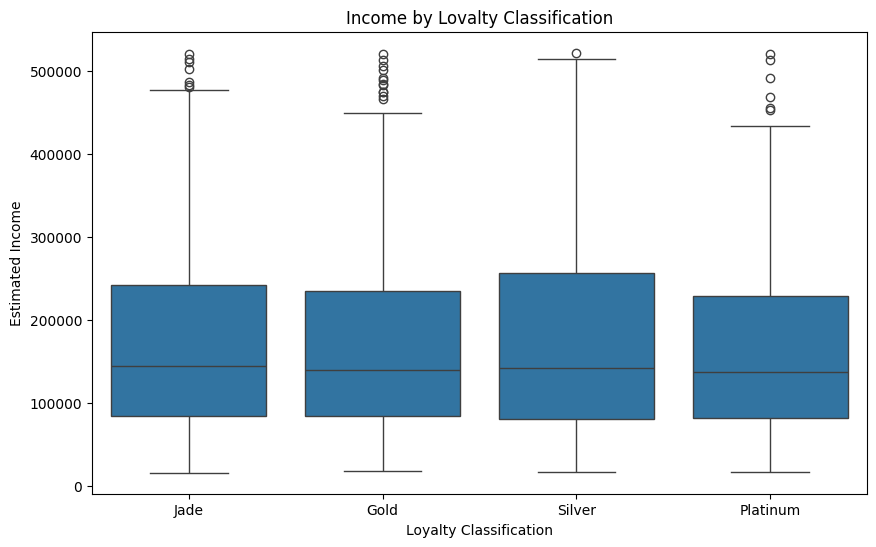

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loyalty Classification', y="Estimated Income", data=df)
plt.title('Income by Lovalty Classification')
plt.show()

### Key Insights

In [45]:
print("Average deposits by Loyalty Classification:")
print(df.groupby('Loyalty Classification')['Bank Deposits'].mean())

Average deposits by Loyalty Classification:
Loyalty Classification
Gold        664384.579521
Jade        696576.840571
Platinum    611699.424164
Silver      658361.291382
Name: Bank Deposits, dtype: float64


In [46]:
print("\nAverage loans by Properties Owned:")
print(df.groupby('Properties Owned')['Bank Loans'].mean())


Average loans by Properties Owned:
Properties Owned
0    567612.802936
1    617272.176765
2    575805.295508
3    603217.677372
Name: Bank Loans, dtype: float64


In [47]:
print("\nTop 5 Occupations with Highest Income:")
print(df.groupby('Occupation')['Estimated Income'].mean().sort_values(ascending=False).head())


Top 5 Occupations with Highest Income:
Occupation
Environmental Tech            251713.951333
Software Engineer IV          251359.600000
Desktop Support Technician    250319.824545
General Manager               239704.070625
Software Engineer I           236520.376923
Name: Estimated Income, dtype: float64


## Loyalty Prediction

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [51]:
target='Loyalty Classification'

In [73]:
x=df.drop(columns=[target,'Joined Bank','Join_Year','Name','Clusters','Location ID','BRId','IAId'])
y=df['Loyalty Classification']

In [74]:
x.head(2)

,Age,Nationality,Occupation,Fee Structure,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,GenderId
0,24,American,Safety Technician IV,High,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.3,1,2,1
1,23,African,Software Consultant,High,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.1,1,3,1


In [75]:
y.head(2)

0    Jade
1    Jade
Name: Loyalty Classification, dtype: object

#### Encoding

In [90]:
#One hot encoding
x=pd.get_dummies(x,drop_first=True)

In [91]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)

In [95]:
print(label_encoder.classes_)

[0 1 2 3]


### Train test split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
print(f"Train shape = {x_train.shape}, Test shape = {x_test.shape}")

Train shape = (2400, 214), Test shape = (600, 214)


#### Scaling

In [97]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Model traning

In [98]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [99]:
y_pred=model.predict(x_test)

### Model Evaluation

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report

In [107]:
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", 
      classification_report(y_test, y_pred, target_names=[str(c) for c in label_encoder.classes_]))

Accuracy =  0.44166666666666665

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.44      1.00      0.61       266
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00       153

    accuracy                           0.44       600
   macro avg       0.11      0.25      0.15       600
weighted avg       0.20      0.44      0.27       600



C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

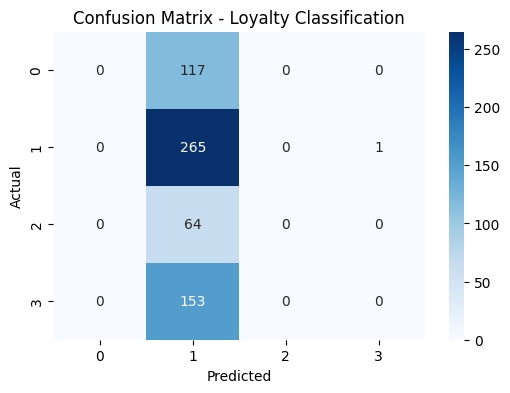

In [109]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loyalty Classification")
plt.show()

##### Hyper-parameter tunning

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best Accuracy: 0.4366666666666667


## Model training using CatBoost for more accuracy

In [113]:
from catboost import CatBoostClassifier, Pool

In [114]:
cat_model=CatBoostClassifier(
    iterations=2000,
    learning_rate=0.03,
    depth=6,
    eval_metric='MultiClass',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100
)

In [115]:
cat_model.fit(x_train,y_train,eval_set=(x_test,y_test))

0:	learn: 1.3788733	test: 1.3793100	best: 1.3793100 (0)	total: 177ms	remaining: 5m 53s
100:	learn: 1.1779367	test: 1.2740082	best: 1.2725053 (76)	total: 1.65s	remaining: 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.272505304
bestIteration = 76

Shrink model to first 77 iterations.


In [116]:
y_pred=cat_model.predict(x_test)

In [117]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.44333333333333336
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.44      1.00      0.61       266
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00       153

    accuracy                           0.44       600
   macro avg       0.11      0.25      0.15       600
weighted avg       0.20      0.44      0.27       600



C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati